### Import, pickle and comparison of transcriptomes

In [1]:
import matplotlib as mpl
mpl.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)
%matplotlib inline
#mpl.style.use('ggplot')

In [49]:
import os.path
import csv
import pandas as pd
import cPickle as pkl
import matplotlib.pyplot as plt
import xlrd
import numpy as np
import scipy.stats

#from matplotlib2tikz import save as tikz_save

from matplotlib import rc

datadir = "../../data"

In [4]:
import joblib
import scipy
#from sklearn.externals import joblib
#from sklearn import preprocessing

Transcriptome according to Shah/Plotkin (http://www.sciencedirect.com/science/article/pii/S0092867413006557) (drawn randomly from Ingolia (2009)):

In [5]:
transcriptome_plotkin_file = "S.cer.mRNA.abndc.ini.tsv"
transcriptome_plotkin_path = os.path.join(datadir, transcriptome_plotkin_file)

transcriptome_plotkin = {}

with open(transcriptome_plotkin_path, mode='r') as tsvin:
    tsvin = csv.reader(tsvin, delimiter='\t')
    tsvin.next() # skip header

    for row in tsvin:
        ORF_name = row[0]
        count = int(row[2])
        transcriptome_plotkin[ORF_name] = count

In [6]:
data = transcriptome_plotkin.values()
pd.Series(data).describe()

count    4839.000000
mean       12.399256
std        45.559384
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      1283.000000
dtype: float64

In [7]:
sum(data)

60000

In [8]:
pkl.dump(transcriptome_plotkin, open("../../parameters/transcriptome_plotkin_old.p", "wb"))

Also create a smaller version of Plotkins transcriptome with approximately 20000 molecules (the range is 20000-60000 in http://book.bionumbers.org/how-many-mrnas-are-in-a-cell/):

In [9]:
transcriptome_plotkin_20000 = {key: int(transcriptome_plotkin[key]/3.0 + 0.5) for key in transcriptome_plotkin}

In [10]:
data = transcriptome_plotkin_20000.values()
pd.Series(data).describe()

count    4839.000000
mean        4.126679
std        15.191293
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       428.000000
dtype: float64

In [11]:
sum(data)

19969

In [12]:
pkl.dump(transcriptome_plotkin_20000, open("../../parameters/transcriptome_plotkin_20000.p", "wb"))

Transcriptome according to Lipson et al. (2009) (http://www.ncbi.nlm.nih.gov/pubmed/19581875), using single-molecule sequencing digital gene expression (smsDGE):

In [13]:
transcriptome_lipson_file = r"nbt.1551-S2.csv"
transcriptome_lipson_path = os.path.join(datadir, transcriptome_lipson_file)

transcriptome_lipson = {}

with open(transcriptome_lipson_path, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    
    transcriptome_lipson = {rows[1]:int(float(rows[9].replace(',','.'))) for rows in reader} # (percentage of the) transcriptome
    #transcriptome_lipson = [(rows[1], rows[9]) for rows in reader] # (percentage of the) transcriptome
    #transcriptome_lipson = [rows for rows in reader] # (percentage of the) transcriptome


In [14]:
data = transcriptome_lipson.values()
pd.Series(data).describe()

count     6710.000000
mean       148.567809
std        582.981330
min          0.000000
25%         16.000000
50%         44.000000
75%         93.000000
max      15909.000000
dtype: float64

In [15]:
sum(data)

996890

In [16]:
pkl.dump(transcriptome_lipson, open("../../parameters/transcriptome_lipson.p", "wb"))

Transcriptome according to Pop (http://msb.embopress.org/content/10/12/770):

In [17]:
transcriptome_pop = pkl.load(open('../../parameters/transcriptome_pop_60000.p'))

In [18]:
data = transcriptome_pop.values()
pd.Series(data).describe()

count    2496.000000
mean       24.038462
std        71.459074
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max      1015.000000
dtype: float64

In [19]:
sum(data)

60000

Transcriptome according to  Siwiak/Zielenkiewicz (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000865#s5):

In [20]:
transcriptome_siwiak_file = r"journal.pcbi.1000865.s003.CSV"
transcriptome_siwiak_path = os.path.join(datadir, transcriptome_siwiak_file)

transcriptome_siwiak = {}

with open(transcriptome_siwiak_path, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    
    transcriptome_siwiak = {rows[0]:int(float(rows[2]) + 0.5) for rows in reader}

In [21]:
data = transcriptome_siwiak.values()
pd.Series(data).describe()

count    4621.000000
mean        7.759143
std        28.522433
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       591.000000
dtype: float64

In [22]:
sum(data)

35855

In [23]:
pkl.dump(transcriptome_siwiak, open("../../parameters/transcriptome_siwiak.p", "wb"))

Transcriptome from Premal Shah in private email (Sept 30, 2015):

http://www.cell.com/cell-reports/abstract/S2211-1247(16)30021-3

In [24]:
file_plotkin = r"weinberg_etal_data.tsv"
filepath_plotkin = os.path.join(datadir, file_plotkin)

with open(filepath_plotkin, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    transcriptome_shah = {elem[0]: int((float(elem[3].strip()) + 0.5) * 62250 / 891000)
                           for elem in content}

In [25]:
data = transcriptome_shah.values()
pd.Series(data).describe()

count    4839.000000
mean       12.400496
std        50.939523
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max      1381.000000
dtype: float64

In [26]:
sum(data)

60006

In [27]:
pkl.dump(transcriptome_shah, open("../../parameters/transcriptome_shah.p", "wb"))

Transcriptome from Miura et al. (http://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-9-574, file 6):

In [28]:
file_miura = r"Absolute_mRNA_Miura_etal_2008.csv"
filepath_miura = os.path.join(datadir, file_miura)
transcriptome_miura = {}

with open(filepath_miura, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    for elem in content:
        # case distinction for integers vs floats:
        if elem[2].strip()[1:-1]:
            transcriptome_miura[elem[0][1:-1]] = float(elem[2].strip()[1:-1])
        else:
            transcriptome_miura[elem[0][1:-1]] = float(elem[2].strip())

In [29]:
data = transcriptome_miura.values()
pd.Series(data).describe()

count    4287.000000
mean        6.423900
std        24.097212
min         0.040000
25%         0.610000
50%         1.350000
75%         3.345000
max       377.170000
dtype: float64

The sum is not 60000 but in the same order of magnitude and perhaps OK considering that 2/3 of the genes are not present:

In [30]:
sum(data)

27539.259999999984

In [31]:
pkl.dump(transcriptome_miura, open("../../parameters/transcriptome_miura.p", "wb"))

Transcriptome constructed by combining Lotte's and Aouefa's data and averaging over time:

In [32]:
transcriptome_teufel = pkl.load(open("../../parameters/transcriptome_teufel.p"))

In [33]:
data = transcriptome_teufel.values()
pd.Series(data).describe()

count    5585.000000
mean        6.412175
std        23.683885
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       628.000000
dtype: float64

In [34]:
sum(data)

35812

Transcriptome from Lahtvee et al. (http://www.sciencedirect.com/science/article/pii/S2405471217300881, data by email from Jens Hahn, 11 July 2017):

In [35]:
file_lahtvee = r'SI_Tables.xlsx'
filepath_lahtvee = os.path.join(datadir, file_lahtvee)
transcriptome_lahtvee = {}

In [36]:
workbook = xlrd.open_workbook(filepath_lahtvee)
worksheet = workbook.sheet_by_name('SI_Table2')
num_rows = worksheet.nrows - 1
num_cells = worksheet.ncols - 1

for curr_row in range(worksheet.nrows)[4:]: # -1 plus number of header rows
    row = worksheet.row(curr_row)
    # print row[0].value, row[1].value
    if isinstance(row[1].value, float):
        transcriptome_lahtvee[row[0].value] = row[1].value / 4219.002 * 60000.0

In [37]:
data = transcriptome_lahtvee.values()
pd.Series(data).describe()

count    5354.000000
mean       11.206574
std        18.330969
min         0.007111
25%         4.494552
50%         6.716371
75%        11.237893
max       494.389810
dtype: float64

In [38]:
sum(data)

59999.99948619597

In [39]:
pkl.dump(transcriptome_lahtvee, open("../../parameters/transcriptome_lahtvee.p", "wb"))

### Scatterplot of transcriptomes:

In [40]:
df1 = pd.DataFrame.from_dict(transcriptome_shah.items())
df1.columns = ['name', '$n_\mathrm{Weinberg}$']

df2 = pd.DataFrame.from_dict(transcriptome_plotkin.items())
df2.columns = ['name', '$n_\mathrm{Shah}$']

df3 = pd.DataFrame.from_dict(transcriptome_siwiak.items())
df3.columns = ['name', '$n_\mathrm{Siwiak}$']

df4 = pd.DataFrame.from_dict(transcriptome_pop.items())
df4.columns = ['name', '$n_\mathrm{Pop}$']

df5 = pd.DataFrame.from_dict(transcriptome_lipson.items())
df5.columns = ['name', '$n_\mathrm{Lipson}$']

df6 = pd.DataFrame.from_dict(transcriptome_miura.items())
df6.columns = ['name', '$n_\mathrm{Miura}$']

df7 = pd.DataFrame.from_dict(transcriptome_lahtvee.items())
df7.columns = ['name', '$n_\mathrm{Lahtvee}$']

df8 = pd.DataFrame.from_dict(transcriptome_teufel.items())
df8.columns = ['name', '$n_\mathrm{Teufel}$']

In [41]:
df = pd.merge(df1, df2, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df3, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df4, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df5, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df6, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df7, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df8, left_on='name', right_on='name', how='outer')

In [42]:
df = df[df.columns[1:]]  # get rid of the names column
df

,$n_\mathrm{Weinberg}$,$n_\mathrm{Shah}$,$n_\mathrm{Siwiak}$,$n_\mathrm{Pop}$,$n_\mathrm{Lipson}$,$n_\mathrm{Miura}$,$n_\mathrm{Lahtvee}$,$n_\mathrm{Teufel}$
0,6.0,8.0,2.0,4.0,65.0,NaN,19.002832,1.0
1,2.0,5.0,1.0,1.0,68.0,1.10,10.158149,0.0
2,8.0,10.0,4.0,10.0,73.0,9.80,8.244635,4.0
3,1.0,3.0,0.0,NaN,43.0,0.58,4.505898,0.0
4,7.0,11.0,4.0,11.0,131.0,1.32,8.163280,5.0
5,1.0,2.0,2.0,NaN,40.0,0.49,7.571238,0.0
6,1.0,4.0,1.0,NaN,14.0,0.57,6.395094,2.0
7,1.0,4.0,2.0,NaN,23.0,NaN,4.782872,0.0
8,3.0,2.0,2.0,3.0,83.0,3.24,9.388975,1.0
9,4.0,7.0,3.0,11.0,69.0,2.08,7.218327,3.0


In [43]:
myedgecolor = 'powderblue'
myfacecolor = 'steelblue'

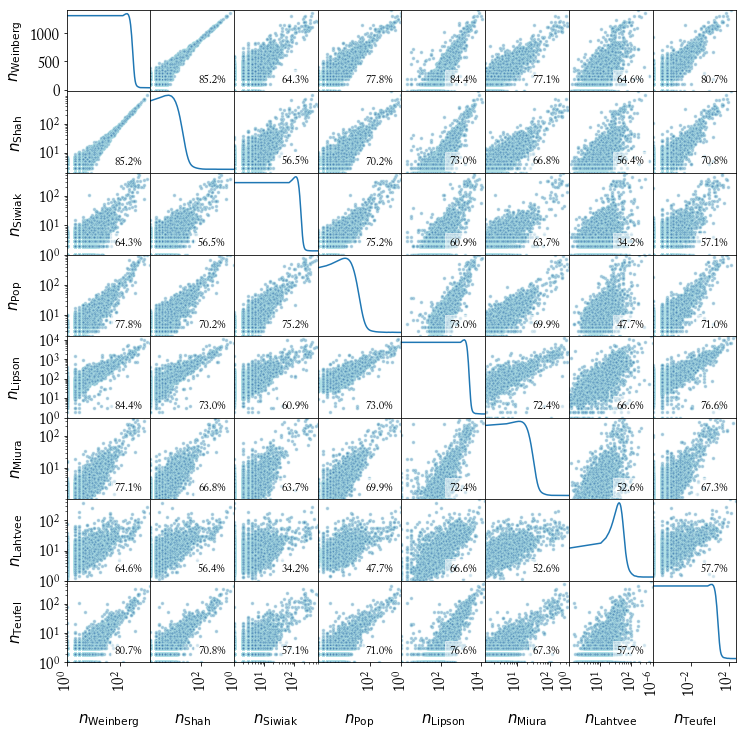

In [50]:
axl = pd.scatter_matrix(df, c=myfacecolor, edgecolor=myedgecolor, alpha=0.5, figsize=(12, 12), diagonal='kde',
                        rasterized=True)

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = max(0.000001, df[df.columns[i]].min())
        minj = max(0.000001, df[df.columns[j]].min())
        if i != j:  # only the scatter plots
            # scale plot axes by their mins and maxs
            ax.set_xlim([minj+1, df[df.columns[j]].max()]) 
            ax.set_ylim([mini+1, df[df.columns[i]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
            #ax.set_rasterized(True)
            # calculate correlation
            corr = scipy.stats.spearmanr(np.array(df.iloc[:, i]), np.array(df.iloc[:, j]), nan_policy='omit')[0]
            displaytext = '{:.1%}'.format(corr)
            # plot correlation on canvas
            t = ax.text(0.90, 0.08, displaytext, verticalalignment='bottom', horizontalalignment='right', 
                    transform=ax.transAxes, fontsize=11, backgroundcolor='white')
            t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j]].max()])
            ax.set_xscale('log')
            #ax.set_rasterized(True)
        # manually delete overlapping axis labels:
        if i==3: # TODO: FIXME: hack!
            y_ticks = ax.yaxis.get_major_ticks()
            y_ticks[4].set_visible(False)
        if i==1: # TODO: FIXME: hack!
            y_ticks = ax.yaxis.get_major_ticks()
            y_ticks[4].set_visible(False)

# Ticklabel size:
#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 15) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 15) for item in axl.ravel()]

# align axis labels:
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.5, 0.5) for s in axl.reshape(-1)]
[s.get_xaxis().set_label_coords(0.5, -0.6) for s in axl.reshape(-1)]

plt.savefig('transcriptomes_scatter_matrix.pgf', bbox_inches='tight', dpi=300)
#tikz_save('transcriptomes_scatter_matrix.tex')